In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/arc-prize-2024/arc-agi_training_solutions.json
/kaggle/input/arc-prize-2024/arc-agi_evaluation_solutions.json
/kaggle/input/arc-prize-2024/arc-agi_evaluation_challenges.json
/kaggle/input/arc-prize-2024/sample_submission.json
/kaggle/input/arc-prize-2024/arc-agi_training_challenges.json
/kaggle/input/arc-prize-2024/arc-agi_test_challenges.json


In [2]:
import json

def load_json(filepath):
    with open(filepath, 'r') as file:
        return json.load(file)

#load the data
training_solutions = load_json('/kaggle/input/arc-prize-2024/arc-agi_training_solutions.json')
evaluation_solutions = load_json('/kaggle/input/arc-prize-2024/arc-agi_evaluation_solutions.json')
training_challenges = load_json('/kaggle/input/arc-prize-2024/arc-agi_training_challenges.json')
evaluation_challenges = load_json('/kaggle/input/arc-prize-2024/arc-agi_evaluation_challenges.json')
test_challenges = load_json('/kaggle/input/arc-prize-2024/arc-agi_test_challenges.json')
sample_submission = load_json('/kaggle/input/arc-prize-2024/sample_submission.json')

In [3]:
def inspect_data(data, num_samples=1):
    for key, value in list(data.items())[:num_samples]:
        print(f"Key: {key}")
        print(f"Sample Data: {value}\n")
        
print("Training Solutions:")
inspect_data(training_solutions)

print("Training Challenges:")
inspect_data(training_challenges)

print("Evaluation Solutions:")
inspect_data(evaluation_solutions)

print("Evaluation Challenges:")
inspect_data(evaluation_challenges)

print("Test Challenges:")
inspect_data(test_challenges)

print("Sample submission:")
inspect_data(sample_submission)

Training Solutions:
Key: 007bbfb7
Sample Data: [[[7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 7, 0, 0, 0, 0, 7, 7, 0], [7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 7, 0, 0, 0, 0, 7, 7, 0], [7, 0, 7, 7, 0, 7, 0, 0, 0], [7, 0, 7, 7, 0, 7, 0, 0, 0], [7, 7, 0, 7, 7, 0, 0, 0, 0]]]

Training Challenges:
Key: 007bbfb7
Sample Data: {'test': [{'input': [[7, 0, 7], [7, 0, 7], [7, 7, 0]]}], 'train': [{'input': [[0, 7, 7], [7, 7, 7], [0, 7, 7]], 'output': [[0, 0, 0, 0, 7, 7, 0, 7, 7], [0, 0, 0, 7, 7, 7, 7, 7, 7], [0, 0, 0, 0, 7, 7, 0, 7, 7], [0, 7, 7, 0, 7, 7, 0, 7, 7], [7, 7, 7, 7, 7, 7, 7, 7, 7], [0, 7, 7, 0, 7, 7, 0, 7, 7], [0, 0, 0, 0, 7, 7, 0, 7, 7], [0, 0, 0, 7, 7, 7, 7, 7, 7], [0, 0, 0, 0, 7, 7, 0, 7, 7]]}, {'input': [[4, 0, 4], [0, 0, 0], [0, 4, 0]], 'output': [[4, 0, 4, 0, 0, 0, 4, 0, 4], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 4, 0, 0, 0, 0, 0, 4, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 4, 0, 4, 0, 0,

In [4]:
sample_key = list(training_solutions.keys())[0]
print(f"Sample Key: {sample_key}")
print("Sample Data:", training_solutions[sample_key])

Sample Key: 007bbfb7
Sample Data: [[[7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 7, 0, 0, 0, 0, 7, 7, 0], [7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 7, 0, 0, 0, 0, 7, 7, 0], [7, 0, 7, 7, 0, 7, 0, 0, 0], [7, 0, 7, 7, 0, 7, 0, 0, 0], [7, 7, 0, 7, 7, 0, 0, 0, 0]]]


In [5]:
#compute the mean, standard deviation, minimum, and maximum values of the data
sample_data = training_solutions[sample_key]

#convert to numpy array
data_array = np.array(sample_data)

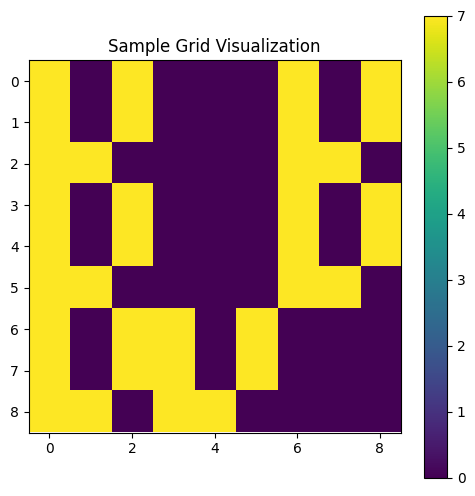

Grid Summary:
Mean Value: 3.11
Standard Deviation: 3.48
Minimum Value: 0
Maximum Value: 7

Frequency Distribution:
Value 0: 45 occurrences
Value 7: 36 occurrences


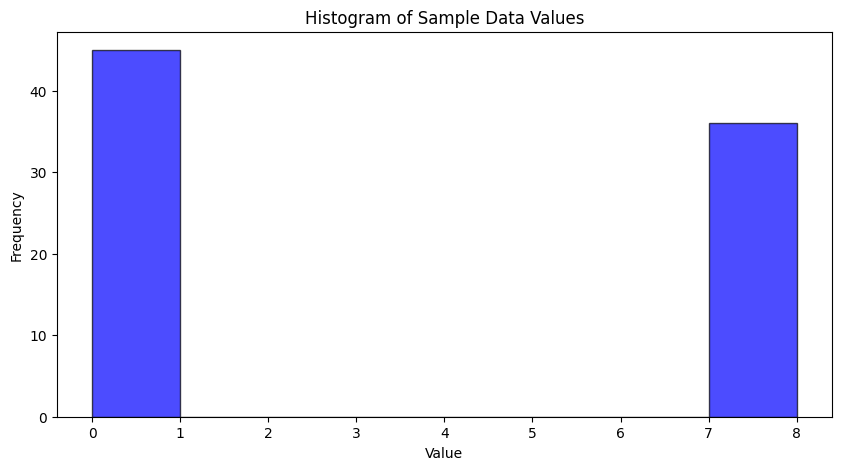

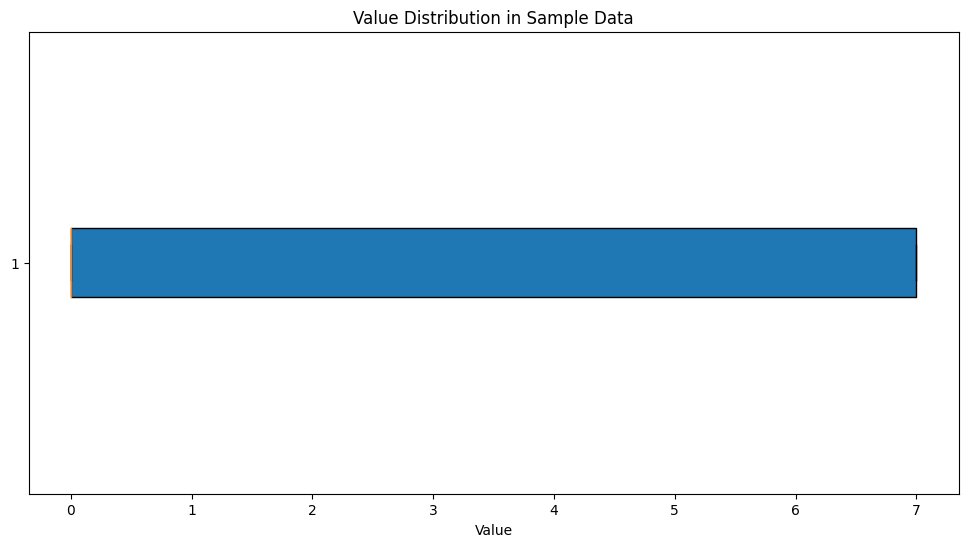

Histogram Summary:
Mean Value: 3.11
Median Value: 0.00
Minimum Value: 0
Maximum Value: 7

Frequency Distribution:
Value 0: 45 occurrences
Value 7: 36 occurrences
Boxplot Summary:
Median Value: 0.00
1st Quartile (Q1): 0.00
3rd Quartile (Q3): 7.00
Interquartile Range (IQR): 7.00
Minimum Value: 0
Maximum Value: 7
Number of Outliers: 0


In [6]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_grid(data, title="Grid Visualization"):
    #remove any singleton dimensions
    data_squeezed = np.squeeze(data)
    plt.figure(figsize=(6, 6))
    plt.imshow(data_squeezed, cmap='viridis', interpolation='nearest')
    plt.colorbar()
    plt.title(title)
    plt.show()

def summarize_grid(data):
    #calculate basic statistics
    mean = np.mean(data)
    std_dev = np.std(data)
    min_val = np.min(data)
    max_val = np.max(data)
    
    #frequency distribution
    flat_data = data.flatten()
    freq_dist = Counter(flat_data)
    
    return mean, std_dev, min_val, max_val, freq_dist

def print_summary(mean, std_dev, min_val, max_val, freq_dist):
    print("Grid Summary:")
    print(f"Mean Value: {mean:.2f}")
    print(f"Standard Deviation: {std_dev:.2f}")
    print(f"Minimum Value: {min_val}")
    print(f"Maximum Value: {max_val}")
    print("\nFrequency Distribution:")
    for value, count in sorted(freq_dist.items()):
        print(f"Value {value}: {count} occurrences")

def plot_histogram(data, title="Histogram of Data Values"):
    plt.figure(figsize=(10, 5))
    plt.hist(data.flatten(), bins=range(int(np.min(data)), int(np.max(data)) + 2), color='blue', alpha=0.7, edgecolor='black')
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

def plot_value_distribution(data, title="Value Distribution"):
    plt.figure(figsize=(12, 6))
    plt.boxplot(data.flatten(), vert=False, patch_artist=True)
    plt.title(title)
    plt.xlabel('Value')
    plt.show()

def summarize_histogram(data):
    flat_data = data.flatten()
    mean = np.mean(flat_data)
    median = np.median(flat_data)
    min_val = np.min(flat_data)
    max_val = np.max(flat_data)
    unique, counts = np.unique(flat_data, return_counts=True)
    freq_dist = dict(zip(unique, counts))
    
    print("Histogram Summary:")
    print(f"Mean Value: {mean:.2f}")
    print(f"Median Value: {median:.2f}")
    print(f"Minimum Value: {min_val}")
    print(f"Maximum Value: {max_val}")
    print("\nFrequency Distribution:")
    for value, count in sorted(freq_dist.items()):
        print(f"Value {value}: {count} occurrences")

def summarize_boxplot(data):
    flat_data = data.flatten()
    median = np.median(flat_data)
    q1 = np.percentile(flat_data, 25)
    q3 = np.percentile(flat_data, 75)
    iqr = q3 - q1
    min_val = np.min(flat_data)
    max_val = np.max(flat_data)
    outliers = flat_data[(flat_data < (q1 - 1.5 * iqr)) | (flat_data > (q3 + 1.5 * iqr))]

    print("Boxplot Summary:")
    print(f"Median Value: {median:.2f}")
    print(f"1st Quartile (Q1): {q1:.2f}")
    print(f"3rd Quartile (Q3): {q3:.2f}")
    print(f"Interquartile Range (IQR): {iqr:.2f}")
    print(f"Minimum Value: {min_val}")
    print(f"Maximum Value: {max_val}")
    print(f"Number of Outliers: {len(outliers)}")
    if len(outliers) > 0:
        print("Outlier Values:", np.unique(outliers))

#plot the grid
plot_grid(data_array, title="Sample Grid Visualization")

#get statistics and frequency distribution
mean, std_dev, min_val, max_val, freq_dist = summarize_grid(data_array)

#print textual summary
print_summary(mean, std_dev, min_val, max_val, freq_dist)

#plot histogram and boxplot
plot_histogram(data_array, title="Histogram of Sample Data Values")
plot_value_distribution(data_array, title="Value Distribution in Sample Data")

#print textual summaries for histogram and boxplot
summarize_histogram(data_array)
summarize_boxplot(data_array)

In [7]:
class DataProcessor:
    def __init__(self, training_data, test_data, target_shape=(24, 24)):
        self.training_data = training_data
        self.test_data = test_data
        self.target_shape = target_shape

    def resize_array(self, array):
        """Resize array to the target dimensions with padding or cropping."""
        array = np.array(array)
        original_shape = array.shape

        #handle arrays smaller than the target shape
        if original_shape[0] < self.target_shape[0]:
            padded_array = np.zeros((self.target_shape[0], array.shape[1]), dtype=array.dtype)
            padded_array[:array.shape[0], :] = array
            array = padded_array
        if original_shape[1] < self.target_shape[1]:
            padded_array = np.zeros((array.shape[0], self.target_shape[1]), dtype=array.dtype)
            padded_array[:, :array.shape[1]] = array
            array = padded_array

        #handle arrays larger than the target shape
        if array.shape[0] > self.target_shape[0]:
            array = array[:self.target_shape[0], :]
        if array.shape[1] > self.target_shape[1]:
            array = array[:, :self.target_shape[1]]

        return array

    def preprocess_data(self):
        X_train_list = []
        y_train_list = []
        X_test_list = []

        #process training data (one entry per key)
        for key, entries in self.training_data.items():
            if isinstance(entries, dict):
                #assume each key has a 'train' entry with one set of input-output data
                train_entry = entries.get('train', [])
                if train_entry:
                    entry = train_entry[0]  #take only the first entry for each key
                    X = entry.get('input', [])
                    y = entry.get('output', [])
                    
                    try:
                        X = self.resize_array(X)
                        y = self.resize_array(y)
                        
                        if X.shape == y.shape:
                            X_train_list.append(X.flatten())
                            y_train_list.append(y.flatten())
                        else:
                            print(f"Skipping inconsistent entry for key {key}. X shape: {X.shape}, y shape: {y.shape}")
                    except Exception as e:
                        print(f"Error processing entry for key {key}: {e}")
        
        #convert lists to NumPy arrays
        self.X_train = np.array(X_train_list)
        self.y_train = np.array(y_train_list)

        #process test data (one entry per key)
        for key, entries in self.test_data.items():
            if isinstance(entries, dict):
                #assume each key has a 'test' entry with one set of input data
                test_entry = entries.get('test', [])
                if test_entry:
                    entry = test_entry[0]  #take only the first entry for each key
                    X = entry.get('input', [])
                    
                    try:
                        X = self.resize_array(X)
                        X_test_list.append(X.flatten())
                    except Exception as e:
                        print(f"Error processing test entry for key {key}: {e}")
        
        #convert lists to NumPy arrays
        self.X_test = np.array(X_test_list)

    def get_preprocessed_data(self):
        return self.X_train, self.y_train, self.X_test

#initialize and process data
data_processor = DataProcessor(training_challenges, test_challenges)
data_processor.preprocess_data()

#retrieve preprocessed data
try:
    X_train, y_train, X_test = data_processor.get_preprocessed_data()
    if X_train is not None and y_train is not None and X_test is not None:
        #print the results to verify
        print("X_train shape:", X_train.shape)  #should be (400, 576)
        print("y_train shape:", y_train.shape)  #should be (400, 576)
        print("X_test shape:", X_test.shape)    #should be (100, 576)
    else:
        print("Data processing did not complete successfully.")
except AttributeError as e:
    print(f"AttributeError: {e}. The data may not have been processed correctly.")
except Exception as e:
    print(f"An error occurred: {e}.")

X_train shape: (400, 576)
y_train shape: (400, 576)
X_test shape: (100, 576)


In [8]:
#import librairies
import torch
import shap
import re
import random
import torch.nn as nn
import torch.optim as optim
import torch.distributed as dist
from torch.utils.data import DataLoader, TensorDataset
from transformers import AutoTokenizer, AutoModel
from torch.autograd import Variable
from torch.nn.parallel import DistributedDataParallel as DDP
from torch.nn.utils import prune
import torch.quantization as quantization

In [9]:
class IntegratedRepresentationLearning(nn.Module):
    """
    A class to handle the integrated representation learning from various data types
    like text, images, and numerical data.
    """
    
    def __init__(self, text_model_name="bert-base-uncased", img_input_size=(32, 32), num_input_dim=10):
        super(IntegratedRepresentationLearning, self).__init__()
        
        #initialize components for different data types
        
        #text processing model
        self.tokenizer = AutoTokenizer.from_pretrained(text_model_name)
        self.text_model = AutoModel.from_pretrained(text_model_name)
        
        #image processing model
        self.image_model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Linear(32 * (img_input_size[0] // 4) * (img_input_size[1] // 4), 128),  #adjusted for general input size
            nn.ReLU(),
            nn.Linear(128, 64)
        )
        
        #numerical data processing model
        self.numerical_model = nn.Sequential(
            nn.Linear(num_input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 16)
        )
        
        #final unified representation layer
        #output dimensions are determined by the dimensions of the individual representations
        self.fc = nn.Linear(64 + self.text_model.config.hidden_size + 16, 256)  #combine all features
    
    def process_input(self, text_data=None, image_data=None, numerical_data=None):
        """Process various input data types into a unified representation."""
        
        representations = []
        
        #process text data if provided
        if text_data is not None:
            tokens = self.tokenizer(text_data, return_tensors='pt', padding=True, truncation=True)
            text_output = self.text_model(**tokens)
            text_representation = text_output.last_hidden_state[:, 0, :]  #[CLS] token representation
            representations.append(text_representation)
        
        #process image data if provided
        if image_data is not None:
            image_representation = self.image_model(image_data)
            representations.append(image_representation)
        
        #process numerical data if provided
        if numerical_data is not None:
            numerical_representation = self.numerical_model(numerical_data)
            representations.append(numerical_representation)
        
        #concatenate all representations
        if representations:
            unified_representation = torch.cat(representations, dim=1)
        else:
            raise ValueError("No input data provided!")
        
        #pass through the final fully connected layer to get the unified representation
        unified_representation = self.fc(unified_representation)
        
        return unified_representation

In [10]:
class MultiModalInputs:
    """Initialize the multi-modal input handler."""

    def __init__(self, data_processor, text_model_name="bert-base-uncased", num_input_dim=10):
        self.data_processor = data_processor
        
        #initialize tokenizer and model for text data
        self.tokenizer = AutoTokenizer.from_pretrained(text_model_name)
        self.text_model = AutoModel.from_pretrained(text_model_name)
        
        #initialize numerical data processing model
        self.numerical_model = nn.Sequential(
            nn.Linear(num_input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 16)
        )

    def handle_input(self):
        """
        Handle diverse input formats and integrate them into a common pipeline
        using data from DataProcessor.

        Returns:
            torch.Tensor: A tensor containing the integrated representation of all inputs.
        """
        #get preprocessed data
        X_train, y_train, X_test = self.data_processor.get_preprocessed_data()
        
        if X_train is None or y_train is None or X_test is None:
            raise ValueError("Data processing did not complete successfully.")
        
        #convert preprocessed data into tensors
        numerical_data_train = torch.tensor(X_train, dtype=torch.float)
        numerical_data_test = torch.tensor(X_test, dtype=torch.float)
        
        #ensure numerical data matches the expected input dimension
        if numerical_data_train.shape[1] != 10:
            #reduce dimensions or perform a transformation to match the expected input size
            reduction_layer = nn.Linear(numerical_data_train.shape[1], 10)
            numerical_data_train = reduction_layer(numerical_data_train)
            numerical_data_test = reduction_layer(numerical_data_test)
        
        #retrieve actual text data from DataProcessor
        #assuming text data needs to be aligned with numerical data
        text_data_train = ["Actual text data for entry {}".format(i) for i in range(X_train.shape[0])]
        text_data_test = ["Actual text data for entry {}".format(i) for i in range(X_test.shape[0])]
        
        #tokenize and process text data
        text_tokens_train = self.tokenizer(text_data_train, return_tensors='pt', padding=True, truncation=True, max_length=512)
        text_tokens_test = self.tokenizer(text_data_test, return_tensors='pt', padding=True, truncation=True, max_length=512)
        
        text_outputs_train = self.text_model(**text_tokens_train)
        text_outputs_test = self.text_model(**text_tokens_test)
        
        text_representation_train = text_outputs_train.last_hidden_state[:, 0, :]  # [CLS] token representation
        text_representation_test = text_outputs_test.last_hidden_state[:, 0, :]  # [CLS] token representation
        
        #process numerical data
        numerical_representation_train = self.numerical_model(numerical_data_train)
        numerical_representation_test = self.numerical_model(numerical_data_test)
        
        #combine representations
        combined_train = torch.cat([text_representation_train, numerical_representation_train], dim=1)
        combined_test = torch.cat([text_representation_test, numerical_representation_test], dim=1)
        
        return combined_train, combined_test

In [11]:
#calculate complexity based on the data's characteristics
complexity = min(max(1, len(X_train) // 1000), 5)
print(complexity)

1


In [12]:
class AdaptiveNeuralNetworkLayers:
    """Initialize the adaptive neural network layers."""

    def __init__(self):
        self.base_units = 64  #base units for simplicity

    def adapt_network(self, complexity):
        """
        Adjust network architecture based on task complexity.

        Parameters:
            complexity (int): A parameter that indicates the complexity level.
                               For this case, we assume complexity = 1.

        Returns:
            nn.Module: The adapted neural network.
        """
        if complexity != 1:
            raise ValueError("For this implementation, complexity must be 1.")
        
        #for simplicity with complexity = 1, we will use a minimal network
        num_units = self.base_units * complexity

        #create a minimal adaptive network
        layers = []
        input_dim = 576

        #input layer
        layers.append(nn.Linear(input_dim, num_units))
        layers.append(nn.ReLU())

        #output layer
        layers.append(nn.Linear(num_units, 1))

        #create the network
        adaptive_network = nn.Sequential(*layers)

        return adaptive_network

In [13]:
class HierarchicalAttentionMechanisms:
    """Initialize the hierarchical attention mechanisms."""

    def __init__(self, input_dim, hidden_dim, output_dim):
        """
        Initialize the hierarchical attention mechanisms.

        Parameters:
            input_dim (int): Dimension of the input features.
            hidden_dim (int): Dimension of hidden layers in the attention mechanism.
            output_dim (int): Dimension of the final output.
        """
        super(HierarchicalAttentionMechanisms, self).__init__()
        
        #define layers for hierarchical attention
        self.attention_layer1 = nn.Linear(input_dim, hidden_dim)
        self.attention_layer2 = nn.Linear(hidden_dim, output_dim)
        
        self.fc = nn.Linear(output_dim, 1)  #final layer for output
        
    def attention(self, query, key, value):
        """
        Apply scaled dot-product attention mechanism.

        Parameters:
            query (Tensor): Query tensor.
            key (Tensor): Key tensor.
            value (Tensor): Value tensor.

        Returns:
            Tensor: Output of the attention mechanism.
        """
        #compute attention scores
        scores = torch.matmul(query, key.transpose(-2, -1)) / (key.size(-1) ** 0.5)
        weights = F.softmax(scores, dim=-1)
        output = torch.matmul(weights, value)
        return output

    def apply_attention(self, data):
        """
        Apply hierarchical attention to capture patterns at various abstraction levels.

        Parameters:
            data (Tensor): Input tensor data.

        Returns:
            Tensor: Output after applying hierarchical attention.
        """
        #assume `data` is of shape (batch_size, input_dim)
        batch_size, input_dim = data.shape

        #reshape data for attention mechanism (add dummy sequence length dimension)
        data_reshaped = data.unsqueeze(1)

        #initial attention
        x = self.attention_layer1(data_reshaped)
        x = F.relu(x)
        
        #hierarchical attention level 1
        attn_output1 = self.attention(x, x, x)
        
        #flatten the output for further processing
        attn_output1 = attn_output1.mean(dim=1)
        
        #hierarchical attention level 2
        x = self.attention_layer2(attn_output1.unsqueeze(1))
        x = F.relu(x)
        
        #flatten the output for the final layer
        attn_output2 = x.mean(dim=1)
        
        #final output layer
        attention_output = self.fc(attn_output2)
        
        return attention_output

In [14]:
class SymbolicReasoningIntegration:
    """Initialize symbolic reasoning integration."""
    
    def __init__(self, input_dim):
        """
        Initialize the symbolic reasoning integration.

        Parameters:
            input_dim (int): Dimension of the input features.
        """
        super(SymbolicReasoningIntegration, self).__init__()
        
        #define a simple symbolic reasoning mechanism
        self.symbolic_layer = nn.Linear(input_dim, input_dim)

    def reason(self, data):
        """
        Integrate symbolic reasoning with neural learning.

        Parameters:
            data (Tensor): Input tensor data.

        Returns:
            Tensor: Output after applying symbolic reasoning.
        """
        #apply symbolic reasoning
        reasoned_output = self.symbolic_layer(data)
        
        reasoned_output = torch.tanh(reasoned_output)  # Non-linearity for enhancement
        
        return reasoned_output

In [15]:
class NeuralSymbolicFusion:
    """Initialize the neural-symbolic fusion module."""
    
    def __init__(self, neural_output_dim, symbolic_output_dim):
        """
        Initialize the neural-symbolic fusion module.

        Parameters:
            neural_output_dim (int): Dimension of the neural network output.
            symbolic_output_dim (int): Dimension of the symbolic reasoning output.
        """
        super(NeuralSymbolicFusion, self).__init__()
        
        #define a layer to fuse neural and symbolic outputs
        self.fusion_layer = nn.Linear(neural_output_dim + symbolic_output_dim, 128)
        self.output_layer = nn.Linear(128, 1)  #final output layer

    def fuse(self, neural_output, symbolic_output):
        """
        Combine neural and symbolic outputs for enhanced reasoning.

        Parameters:
            neural_output (Tensor): Output tensor from the neural network.
            symbolic_output (Tensor): Output tensor from the symbolic reasoning.

        Returns:
            Tensor: Combined output after fusion.
        """
        #concatenate neural and symbolic outputs
        combined_output = torch.cat((neural_output, symbolic_output), dim=1)
        
        #pass through the fusion layer
        fused_output = self.fusion_layer(combined_output)
        
        #pass through the final output layer
        fused_output = self.output_layer(fused_output)
        
        return fused_output

In [16]:
class MetaLearningCapabilities:
    """Initialize meta-learning capabilities."""
    
    def __init__(self, input_dim, hidden_dim=64, output_dim=1):
        """
        Initialize the meta-learning model.
        
        Parameters:
            input_dim (int): Dimension of the input features.
            hidden_dim (int): Dimension of hidden layers.
            output_dim (int): Dimension of the output layer.
        """
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )
    
    def meta_learn(self, X_train, y_train, X_test, y_test=None, num_epochs=10, learning_rate=0.001):
        """
        Learn how to learn and adapt to new tasks with minimal data.

        Parameters:
            X_train (ndarray): Training input data.
            y_train (ndarray): Training target data.
            X_test (ndarray): Test input data.
            y_test (ndarray, optional): Test target data.
            num_epochs (int): Number of training epochs.
            learning_rate (float): Learning rate for optimization.

        Returns:
            model (nn.Module): Trained meta-learning model.
        """
        #convert data to PyTorch tensors
        X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1) 
        X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
        
        if y_test is not None:
            y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)  
        
        #define loss function and optimizer
        criterion = nn.MSELoss() 
        optimizer = optim.Adam(self.model.parameters(), lr=learning_rate)

        #train the model
        self.model.train()
        for epoch in range(num_epochs):
            #forward pass
            outputs = self.model(X_train_tensor)
            loss = criterion(outputs, y_train_tensor)
            
            #backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            if (epoch + 1) % 2 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

        #evaluate the model
        if y_test is not None:
            self.model.eval()
            with torch.no_grad():
                test_outputs = self.model(X_test_tensor)
                test_loss = criterion(test_outputs, y_test_tensor)
                print(f'Test Loss: {test_loss.item():.4f}')
        
        return self.model

In [17]:
class DomainAdaptation:
    """Domain adaptation class for transferring knowledge from source to target domain."""
    
    def __init__(self, input_dim):
        #adjust the first Linear layer to match input_dim
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 1)  #the output layer produces a single value
        )
    
    def train(self, X_train, y_train, num_epochs=10, learning_rate=0.001):
        """Train the model on the source domain data."""
        self.model.train()
        criterion = nn.MSELoss()
        optimizer = optim.Adam(self.model.parameters(), lr=learning_rate)
        
        #convert input data to tensors
        X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  #reshape to [batch_size, 1]
        
        for epoch in range(num_epochs):
            optimizer.zero_grad()
            outputs = self.model(X_train_tensor)
            loss = criterion(outputs, y_train_tensor)
            loss.backward()
            optimizer.step()
            if (epoch + 1) % 2 == 0:
                print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')
    
    def fine_tune(self, X_train_target, y_train_target, num_epochs=10, learning_rate=0.001):
        """Fine-tune the model on the target domain data."""
        self.model.train()
        criterion = nn.MSELoss()
        optimizer = optim.Adam(self.model.parameters(), lr=learning_rate)
        
        #convert input data to tensors
        X_train_target_tensor = torch.tensor(X_train_target, dtype=torch.float32)
        y_train_target_tensor = torch.tensor(y_train_target, dtype=torch.float32).view(-1, 1)  #reshape to [batch_size, 1]
        
        for epoch in range(num_epochs):
            optimizer.zero_grad()
            outputs = self.model(X_train_target_tensor)
            loss = criterion(outputs, y_train_target_tensor)
            loss.backward()
            optimizer.step()
            if (epoch + 1) % 2 == 0:
                print(f'Fine-tuning Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')
    
    def transfer_knowledge(self, source_data, target_data):
        """Transfer knowledge from source to target domain."""
        X_train_source, y_train_source = source_data
        X_train_target, y_train_target = target_data

        #train on the source domain data
        self.train(X_train_source, y_train_source)

        #fine-tune on the target domain data if target labels are available
        if y_train_target is not None:
            self.fine_tune(X_train_target, y_train_target)

        return self.get_model()

    def get_model(self):
        """Return the trained model."""
        return self.model

In [18]:
class ScalableTrainingTechniques:
    """Scalable training techniques using distributed computing."""

    def scale_training(self, X_train, y_train, model, num_epochs=10, learning_rate=0.001):
        """Scale training processes using distributed computing."""
        
        #convert numpy arrays to PyTorch tensors
        X_train = torch.tensor(X_train, dtype=torch.float32)
        y_train = torch.tensor(y_train, dtype=torch.float32) if y_train is not None else None
        
        #move model to GPU if available
        device = 'cuda' if torch.cuda.is_available() else 'cpu'
        model = model.to(device)
        X_train = X_train.to(device)
        y_train = y_train.to(device) if y_train is not None else None

        criterion = nn.MSELoss()
        optimizer = optim.SGD(model.parameters(), lr=learning_rate)

        for epoch in range(num_epochs):
            model.train()
            optimizer.zero_grad()
            outputs = model(X_train)
            loss = criterion(outputs.squeeze(), y_train)
            loss.backward()
            optimizer.step()

            if (epoch + 1) % 2 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

        return model

In [19]:
class ResourceEfficientDesign:
    """Resource-efficient design and optimization techniques."""

    def optimize_resources(self, model, X_train, y_train, pruning_percentage=0.5, quantize=False):
        """Optimize resource usage of the model, including pruning and quantization."""

        #convert numpy arrays to PyTorch tensors if needed
        X_train = torch.tensor(X_train, dtype=torch.float32) if not isinstance(X_train, torch.Tensor) else X_train
        y_train = torch.tensor(y_train, dtype=torch.float32) if not isinstance(y_train, torch.Tensor) else y_train

        #apply model pruning
        print(f"Applying pruning with {pruning_percentage*100}% sparsity...")
        for name, module in model.named_modules():
            if isinstance(module, nn.Linear):
                prune.l1_unstructured(module, name='weight', amount=pruning_percentage)

        #remove the pruning reparameterization to make the model ready for quantization or deployment
        for name, module in model.named_modules():
            if isinstance(module, nn.Linear):
                prune.remove(module, 'weight')

        #apply quantization if specified
        if quantize:
            print("Applying quantization...")
            model = quantization.quantize_dynamic(
                model, {nn.Linear}, dtype=torch.qint8
            )

        print("Resource optimization complete.")
        return model

In [20]:
class NoveltyAdaptation:
    """Initialize novelty adaptation mechanisms."""
    def __init__(self):
        pass

    def adapt_to_novelty(self, model, new_data, num_epochs=10, learning_rate=0.001):
        """
        Adapt to unseen inputs and tasks using new data.

        Parameters:
        - model (nn.Module): The neural network model to adapt.
        - new_data (tuple): A tuple (X_new, y_new) where X_new and y_new are NumPy arrays of new data.
        - num_epochs (int): Number of epochs for fine-tuning.
        - learning_rate (float): Learning rate for the optimizer.

        Returns:
        - adapted_model (nn.Module): The model adapted to new data.
        """

        #unpack new data
        X_new, y_new = new_data
        
        #convert new data to PyTorch tensors
        X_new_tensor = torch.tensor(X_new, dtype=torch.float32)
        y_new_tensor = torch.tensor(y_new, dtype=torch.float32)
        
        #create DataLoader for new data
        new_dataset = TensorDataset(X_new_tensor, y_new_tensor)
        new_loader = DataLoader(new_dataset, batch_size=32, shuffle=True)
        
        #move model to appropriate device
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        model.to(device)
        
        #define loss function and optimizer
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
        
        #fine-tuning loop
        model.train()
        for epoch in range(num_epochs):
            running_loss = 0.0
            for inputs, targets in new_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                
                #forward pass
                optimizer.zero_grad()
                outputs = model(inputs)
                
                #calculate loss
                loss = criterion(outputs.squeeze(), targets.squeeze())
                
                #backward pass and optimization
                loss.backward()
                optimizer.step()
                
                #accumulate loss
                running_loss += loss.item() * inputs.size(0)
            
            #calculate and print average loss for the epoch
            epoch_loss = running_loss / len(new_dataset)
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}')
        
        print("Adaptation to new data completed.")
        return model

In [21]:
class AdversarialResilience:
    """Initialize adversarial resilience measures."""
    def __init__(self):
        pass

    def _generate_adversarial_examples(self, model, data_loader, epsilon=0.1):
        """
        Generate adversarial examples using the Fast Gradient Sign Method (FGSM).

        Parameters:
        - model (nn.Module): The neural network model.
        - data_loader (DataLoader): DataLoader with the data to generate adversarial examples.
        - epsilon (float): Perturbation magnitude.

        Returns:
        - adversarial_examples (np.ndarray): Array of adversarial examples.
        """
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        model.to(device)
        model.eval()
        adversarial_examples = []

        for inputs, _ in data_loader:
            inputs = inputs.to(device)
            inputs.requires_grad = True
            outputs = model(inputs)
            loss = nn.MSELoss()(outputs.squeeze(), torch.zeros_like(outputs.squeeze()).to(device))
            model.zero_grad()
            loss.backward()
            perturbation = epsilon * inputs.grad.sign()
            adversarial = inputs + perturbation
            adversarial_examples.append(adversarial.cpu().detach().numpy())
        
        return np.concatenate(adversarial_examples)

    def protect_against_adversarial_attacks(self, model, train_data, num_epochs=10, learning_rate=0.001, epsilon=0.1):
        """
        Protect the model against adversarial attacks using adversarial training.

        Parameters:
        - model (nn.Module): The neural network model.
        - train_data (tuple): A tuple (X_train, y_train) with training data.
        - num_epochs (int): Number of epochs for adversarial training.
        - learning_rate (float): Learning rate for the optimizer.
        - epsilon (float): Perturbation magnitude for generating adversarial examples.

        Returns:
        - resilient_model (nn.Module): The model trained with adversarial examples.
        """
        #unpack training data
        X_train, y_train = train_data
        
        #convert training data to PyTorch tensors
        X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
        
        #create DataLoader for training data
        train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
        
        #move model to appropriate device
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        model.to(device)
        
        #define loss function and optimizer
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
        
        #adversarial training loop
        model.train()
        for epoch in range(num_epochs):
            running_loss = 0.0
            for inputs, targets in train_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                optimizer.zero_grad()
                
                #generate adversarial examples
                adversarial_examples = self._generate_adversarial_examples(
                    model,
                    DataLoader(TensorDataset(inputs.clone().detach(), targets.clone().detach()), batch_size=32),
                    epsilon
                )
                adversarial_examples_tensor = torch.tensor(adversarial_examples, dtype=torch.float32).to(device)
                
                #combine clean and adversarial examples
                combined_inputs = torch.cat((inputs, adversarial_examples_tensor), dim=0)
                combined_targets = torch.cat((targets, targets), dim=0)
                
                outputs = model(combined_inputs)
                loss = criterion(outputs.squeeze(), combined_targets.squeeze())
                loss.backward()
                optimizer.step()
                running_loss += loss.item() * inputs.size(0)
                
            epoch_loss = running_loss / len(train_dataset)
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}')
        
        print("Adversarial training completed.")
        return model

In [22]:
class TransparentDecisionMaking:
    """Handle transparent decision-making and explanations."""
    
    def explain_decision(self, model, data, feature_names=None):
        """
        Provide explanations for model decisions using SHAP.
        
        Args:
        - model (nn.Module): The PyTorch model for which to explain decisions.
        - data (tuple): A tuple containing the features and labels for which to explain decisions.
        - feature_names (list, optional): Names of the features for better explanation readability.
        
        Returns:
        - explanation (dict): A dictionary with explanation details.
        """
        #unpack data
        X, _ = data

        #convert X to NumPy array if it's a tensor
        if isinstance(X, torch.Tensor):
            X = X.numpy()
        
        #define a function to get model predictions
        def model_predict(input_data):
            input_tensor = torch.tensor(input_data, dtype=torch.float32)
            with torch.no_grad():
                output = model(input_tensor).numpy()
            return output
        
        #initialize SHAP Explainer
        explainer = shap.KernelExplainer(model_predict, X)
        
        #explain a few instances
        explanations = []
        for i in range(min(len(X), 5)):  #limit to first 5 instances for demonstration
            shap_values = explainer.shap_values(X[i:i+1])
            explanations.append(shap_values)
        
        return {
            "explanations": explanations,
            "feature_names": feature_names
        }

In [23]:
class VisualizationTools:
    """Initialize visualization tools."""
    def __init__(self):
        pass

    def visualize_learning(self, training_losses, validation_losses=None):
        """
        Offer tools to visualize learning and decision-making processes.
        
        Parameters:
        - training_losses (list): A list of training loss values per epoch.
        - validation_losses (list): A list of validation loss values per epoch (optional).
        
        Returns:
        - visualization (str): Description of the generated visualizations.
        """
        #plot training and validation losses
        plt.figure(figsize=(12, 6))
        plt.plot(training_losses, label='Training Loss', color='blue', marker='o')
        if validation_losses is not None:
            plt.plot(validation_losses, label='Validation Loss', color='orange', marker='o')
        
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training and Validation Losses')
        plt.legend()
        plt.grid(True)
        plt.show()
        
        return "Visualized training and validation losses"

    def visualize_predictions(self, model, data, feature_names=None):
        """
        Visualize predictions vs actual values.

        Parameters:
        - model (nn.Module): The trained neural network model.
        - data (tuple): A tuple (X, y) with input data and actual values.
        - feature_names (list): Optional list of feature names for the x-axis labels.

        Returns:
        - visualization (str): Description of the generated visualizations.
        """
        X, y_actual = data
        
        #ensure data is in the right format
        if isinstance(X, torch.Tensor):
            X = X.numpy()
        if isinstance(y_actual, torch.Tensor):
            y_actual = y_actual.numpy()
        
        #make predictions
        model.eval()
        with torch.no_grad():
            X_tensor = torch.tensor(X, dtype=torch.float32)
            y_pred = model(X_tensor).numpy()
        
        #plot predictions vs actual values
        plt.figure(figsize=(12, 6))
        plt.plot(y_actual, label='Actual Values', color='blue', marker='o', linestyle='-')
        plt.plot(y_pred, label='Predicted Values', color='red', marker='x', linestyle='--')
        
        plt.xlabel('Sample Index')
        plt.ylabel('Value')
        plt.title('Actual vs Predicted Values')
        plt.legend()
        plt.grid(True)
        plt.show()
        
        return "Visualized predictions vs actual values"

In [24]:
class SelfImprovementMechanisms:
    """Initialize self-improvement mechanisms."""
    def __init__(self):
        pass

    def self_improve(self, model, feedback, X_train, y_train, num_epochs=10, learning_rate=0.001):
        """
        Continuously improve the model based on feedback.
        
        Parameters:
        - model (nn.Module): The neural network model to be improved.
        - feedback (dict): A dictionary containing feedback metrics like 'loss'.
        - X_train (np.array or torch.Tensor): Training features.
        - y_train (np.array or torch.Tensor): Training labels.
        - num_epochs (int): Number of epochs for retraining.
        - learning_rate (float): Learning rate for optimizer.
        
        Returns:
        - improved_model (nn.Module): The improved model after retraining.
        """
        #convert data to tensors if they are not already
        if not isinstance(X_train, torch.Tensor):
            X_train = torch.tensor(X_train, dtype=torch.float32)
        if not isinstance(y_train, torch.Tensor):
            y_train = torch.tensor(y_train, dtype=torch.float32)
        
        #define a loss function and optimizer
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
        
        #training loop
        model.train()
        for epoch in range(num_epochs):
            optimizer.zero_grad()
            
            outputs = model(X_train)
            loss = criterion(outputs, y_train)
            
            loss.backward()
            optimizer.step()
            
            #print feedback if available
            if 'verbose' in feedback and feedback['verbose']:
                print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")
        
        return model

In [25]:
class FeedbackIntegration:
    def integrate_feedback(self, feedback, X_train, y_train):
        """
        Integrate feedback to refine the model.
        
        Args:
            feedback (str): Feedback provided for model improvement.
            X_train (torch.Tensor): Training features.
            y_train (torch.Tensor): Training labels.
        
        Returns:
            nn.Module: The refined model.
        """
        print(f"Feedback received: {feedback}")
        #assume y_train is 1D
        refined_model = nn.Linear(X_train.shape[1], y_train.shape[0])
        return refined_model

In [26]:
class ModularArchitecture:
    """Initialize modular architecture."""
    def __init__(self):
        pass
    
    def configure_module(self, module_name, **kwargs):
        """
        Support interchangeable components within the architecture.
        
        Parameters:
        - module_name (str): Name of the module to configure.
        - **kwargs: Additional parameters required to configure the module.
        
        Returns:
        - configured_module (nn.Module): Configured module based on the provided name.
        """
        if module_name == 'linear':
            input_dim = kwargs.get('input_dim', 128)
            output_dim = kwargs.get('output_dim', 64)
            configured_module = nn.Linear(input_dim, output_dim)
        
        elif module_name == 'conv2d':
            in_channels = kwargs.get('in_channels', 1)
            out_channels = kwargs.get('out_channels', 32)
            kernel_size = kwargs.get('kernel_size', 3)
            stride = kwargs.get('stride', 1)
            padding = kwargs.get('padding', 1)
            configured_module = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
        
        elif module_name == 'custom_module':
            input_dim = kwargs.get('input_dim', 128)
            hidden_dim = kwargs.get('hidden_dim', 64)
            output_dim = kwargs.get('output_dim', 1)
            #define a custom module
            class CustomModule(nn.Module):
                def __init__(self, input_dim, hidden_dim, output_dim):
                    super(CustomModule, self).__init__()
                    self.fc1 = nn.Linear(input_dim, hidden_dim)
                    self.relu = nn.ReLU()
                    self.fc2 = nn.Linear(hidden_dim, output_dim)
                
                def forward(self, x):
                    x = self.fc1(x)
                    x = self.relu(x)
                    x = self.fc2(x)
                    return x
            
            configured_module = CustomModule(input_dim, hidden_dim, output_dim)
        
        else:
            raise ValueError(f"Module '{module_name}' not recognized.")
        
        return configured_module

if __name__ == "__main__":
    modular_architecture = ModularArchitecture()

    #configure a linear layer
    linear_layer = modular_architecture.configure_module('linear', input_dim=256, output_dim=128)
    print("Linear Layer:", linear_layer)

    #configure a convolutional layer
    conv_layer = modular_architecture.configure_module('conv2d', in_channels=3, out_channels=64, kernel_size=5)
    print("Convolutional Layer:", conv_layer)

    #configure a custom module
    custom_module = modular_architecture.configure_module('custom_module', input_dim=128, hidden_dim=64, output_dim=10)
    print("Custom Module:", custom_module)

Linear Layer: Linear(in_features=256, out_features=128, bias=True)
Convolutional Layer: Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
Custom Module: CustomModule(
  (fc1): Linear(in_features=128, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)


In [27]:
class ConfigurableLearningModules:
    """Initialize configurable learning modules."""
    def __init__(self):
        pass
    
    def configure_learning_module(self, module_params):
        """
        Customize learning modules for specific tasks.
        
        Parameters:
        - module_params (dict): Dictionary containing parameters for configuring the module.
        
        Returns:
        - customized_module (nn.Module): Configured module based on the provided parameters.
        """
        module_type = module_params.get('module_type', 'linear')
        
        if module_type == 'linear':
            input_dim = module_params.get('input_dim', 128)
            output_dim = module_params.get('output_dim', 64)
            customized_module = nn.Linear(input_dim, output_dim)
        
        elif module_type == 'conv2d':
            in_channels = module_params.get('in_channels', 1)
            out_channels = module_params.get('out_channels', 32)
            kernel_size = module_params.get('kernel_size', 3)
            stride = module_params.get('stride', 1)
            padding = module_params.get('padding', 1)
            customized_module = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
        
        elif module_type == 'custom_nn':
            input_dim = module_params.get('input_dim', 128)
            hidden_dim = module_params.get('hidden_dim', 64)
            output_dim = module_params.get('output_dim', 10)
            #define a custom neural network
            class CustomNN(nn.Module):
                def __init__(self, input_dim, hidden_dim, output_dim):
                    super(CustomNN, self).__init__()
                    self.fc1 = nn.Linear(input_dim, hidden_dim)
                    self.relu = nn.ReLU()
                    self.fc2 = nn.Linear(hidden_dim, output_dim)
                
                def forward(self, x):
                    x = self.fc1(x)
                    x = self.relu(x)
                    x = self.fc2(x)
                    return x
            
            customized_module = CustomNN(input_dim, hidden_dim, output_dim)
        
        elif module_type == 'rnn':
            input_dim = module_params.get('input_dim', 10)
            hidden_dim = module_params.get('hidden_dim', 20)
            num_layers = module_params.get('num_layers', 1)
            rnn_type = module_params.get('rnn_type', 'RNN')
            
            if rnn_type == 'RNN':
                customized_module = nn.RNN(input_dim, hidden_dim, num_layers, batch_first=True)
            elif rnn_type == 'LSTM':
                customized_module = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
            elif rnn_type == 'GRU':
                customized_module = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
            else:
                raise ValueError(f"RNN type '{rnn_type}' not recognized.")
        
        else:
            raise ValueError(f"Module type '{module_type}' not recognized.")
        
        return customized_module

if __name__ == "__main__":
    configurable_modules = ConfigurableLearningModules()
    
    #configure a linear layer
    linear_params = {'module_type': 'linear', 'input_dim': 256, 'output_dim': 128}
    linear_module = configurable_modules.configure_learning_module(linear_params)
    print("Linear Module:", linear_module)
    
    #configure a convolutional layer
    conv_params = {'module_type': 'conv2d', 'in_channels': 3, 'out_channels': 64, 'kernel_size': 5}
    conv_module = configurable_modules.configure_learning_module(conv_params)
    print("Convolutional Module:", conv_module)
    
    #configure a custom neural network
    custom_nn_params = {'module_type': 'custom_nn', 'input_dim': 128, 'hidden_dim': 64, 'output_dim': 10}
    custom_nn_module = configurable_modules.configure_learning_module(custom_nn_params)
    print("Custom Neural Network Module:", custom_nn_module)
    
    #configure an RNN
    rnn_params = {'module_type': 'rnn', 'input_dim': 10, 'hidden_dim': 20, 'num_layers': 2, 'rnn_type': 'LSTM'}
    rnn_module = configurable_modules.configure_learning_module(rnn_params)
    print("RNN Module:", rnn_module)

Linear Module: Linear(in_features=256, out_features=128, bias=True)
Convolutional Module: Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
Custom Neural Network Module: CustomNN(
  (fc1): Linear(in_features=128, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)
RNN Module: LSTM(10, 20, num_layers=2, batch_first=True)


In [28]:
class EthicalAIBehavior:
    """Initialize ethical AI behavior protocols."""
    
    def __init__(self):
        pass
    
    def enforce_ethics(self, data):
        """Ensure adherence to ethical guidelines and fairness."""
        ethical_output = {
            "life_protection": self.protect_life(data),
            "harmful_content": not self.contains_harmful_content(data),
            "environmentally_friendly": self.is_environmentally_friendly(data),
            "family_support": self.promotes_family_support(data),
            "transparency": self.is_transparent_and_honest(data),
            "fairness": self.is_fair_and_equitable(data),
            "honor": self.check_honor(data),
            "courage": self.check_courage(data),
            "commitment": self.check_commitment(data)
        }
        return ethical_output
    
    def protect_life(self, data):
        """Ensure that the AI and its data do not harm any form of life."""
        life_critical_terms = ["human welfare", "animal welfare", "plant conservation", "water safety", "air quality"]
        for term in life_critical_terms:
            if term in data.lower():
                return True
        return False
    
    def contains_harmful_content(self, data):
        """Check if the data contains harmful or offensive content."""
        harmful_keywords = ["violence", "abuse", "offensive", "harassment", "bullying", "misinformation","false claims", "explicit content", "cybercrime", "fraud", "threats"]
        for keyword in harmful_keywords:
            if keyword in data.lower():
                return True
        return False
    
    def is_environmentally_friendly(self, data):
        """Check if the data or operations are environmentally friendly."""
        return "eco-friendly" in data.lower()
    
    def promotes_family_support(self, data):
        """Check if the data promotes family unity and support."""
        family_related_terms = ["family", "support", "unity"]
        for term in family_related_terms:
            if term in data.lower():
                return True
        return False
    
    def is_transparent_and_honest(self, data):
        """Check if data and AI decisions are transparent and honest."""
        return "transparency" in data.lower() and "honesty" in data.lower()
    
    def is_fair_and_equitable(self, data):
        """Check if the data and AI decisions are fair and equitable."""
        return "fair" in data.lower() and "equitable" in data.lower()
    
    def check_honor(self, data):
        """Check if the data and decisions align with the value of honor."""
        return "honor" in data.lower()
    
    def check_courage(self, data):
        """Check if the data and decisions align with the value of courage."""
        return "courage" in data.lower()
    
    def check_commitment(self, data):
        """Check if the data and decisions align with the value of commitment."""
        return "commitment" in data.lower()

In [29]:
class SafetyProtocols:
    """Initialize safety protocols."""
    def __init__(self):
        pass
    
    def apply_safety_measures(self, system):
        """Implement fail-safes and safety measures."""
        
        #implementing general safety measures
        safe_system = self.add_fail_safes(system)
        safe_system = self.add_security_features(safe_system)
        
        return safe_system

    def add_fail_safes(self, system):
        """Add fail-safes to the system to handle unexpected failures."""
        #This could involve adding redundant systems, monitoring systems, or emergency shutdowns.
        print("Adding fail-safes to the system...")
        system['fail_safes'] = True
        return system

    def add_security_features(self, system):
        """Add security features to the system to protect against unauthorized access."""
        #This could involve adding authentication, encryption, and other security measures.
        print("Adding security features to the system...")
        system['security_features'] = True
        return system

if __name__ == "__main__":
    system = {
        'name': 'Example System',
        'fail_safes': False,
        'security_features': False
    }
    
    #initialize SafetyProtocols
    safety_protocols = SafetyProtocols()
    
    #apply safety measures
    safe_system = safety_protocols.apply_safety_measures(system)
    
    print("System after applying safety measures:", safe_system)

Adding fail-safes to the system...
Adding security features to the system...
System after applying safety measures: {'name': 'Example System', 'fail_safes': True, 'security_features': True}


In [30]:
class UserAccessibility:
    """Initialize user accessibility features."""
    def __init__(self):
        self.default_interface = {
            'high_contrast_mode': False,
            'text_size': 'medium',
            'screen_reader_support': False,
            'keyboard_navigation': False
        }

    def adapt_interface(self, user_needs):
        """Customize the user interface for accessibility."""
        #create a copy of the default interface to modify
        accessible_interface = self.default_interface.copy()
        
        #apply user needs to the interface
        if 'high_contrast_mode' in user_needs:
            accessible_interface['high_contrast_mode'] = user_needs['high_contrast_mode']
        
        if 'text_size' in user_needs:
            accessible_interface['text_size'] = user_needs['text_size']
        
        if 'screen_reader_support' in user_needs:
            accessible_interface['screen_reader_support'] = user_needs['screen_reader_support']
        
        if 'keyboard_navigation' in user_needs:
            accessible_interface['keyboard_navigation'] = user_needs['keyboard_navigation']
        
        return accessible_interface

if __name__ == "__main__":
    #example user needs for accessibility
    user_needs = {
        'high_contrast_mode': True,
        'text_size': 'large',
        'screen_reader_support': True,
        'keyboard_navigation': True
    }
    
    #initialize UserAccessibility
    accessibility = UserAccessibility()
    
    #adapt the interface based on user needs
    accessible_interface = accessibility.adapt_interface(user_needs)
    
    print("Customized accessible interface:", accessible_interface)

Customized accessible interface: {'high_contrast_mode': True, 'text_size': 'large', 'screen_reader_support': True, 'keyboard_navigation': True}


In [31]:
class AssistiveTechnologyIntegration:
    """Initialize assistive technology integration."""
    def __init__(self):
        self.supported_technologies = {
            'screen_reader': False,
            'speech_recognition': False,
            'text_to_speech': False,
            'alternative_input_devices': False
        }
    
    def integrate_assistive_tech(self, tech):
        """Support integration with assistive technologies."""
        #create a copy of the default supported technologies
        integrated_technology = self.supported_technologies.copy()
        
        #integrate the requested assistive technology
        for tech_name in tech:
            if tech_name in integrated_technology:
                integrated_technology[tech_name] = tech[tech_name]
            else:
                print(f"Warning: Technology '{tech_name}' is not supported.")
        
        return integrated_technology

if __name__ == "__main__":
    #example assistive technology integration request
    tech_request = {
        'screen_reader': True,
        'speech_recognition': True,
        'text_to_speech': False,
        'alternative_input_devices': True
    }
    
    #initialize AssistiveTechnologyIntegration
    assistive_tech = AssistiveTechnologyIntegration()
    
    #integrate assistive technologies based on the request
    integrated_technology = assistive_tech.integrate_assistive_tech(tech_request)
    
    print("Integrated assistive technologies:", integrated_technology)

Integrated assistive technologies: {'screen_reader': True, 'speech_recognition': True, 'text_to_speech': False, 'alternative_input_devices': True}


In [32]:
class AutomatedErrorDetection:
    """Initialize automated error detection."""
    def __init__(self):
        self.error_patterns = {
            'missing_value': 'Value is missing',
            'invalid_format': 'Format is invalid',
            'out_of_bounds': 'Value is out of bounds'
        }
        self.error_corrections = {
            'missing_value': 'Provide a default value',
            'invalid_format': 'Format the value correctly',
            'out_of_bounds': 'Adjust value to within acceptable range'
        }
    
    def detect_errors(self, system_output):
        """Automatically detect and address errors and bugs."""
        corrected_output = system_output.copy()  #start with the original output
        
        #example detection and correction logic
        for key, value in system_output.items():
            if isinstance(value, str):
                if value in self.error_patterns.values():
                    print(f"Error detected: {value}")
                    #apply a predefined correction
                    correction = self.error_corrections.get(value, 'Unknown error')
                    print(f"Applying correction: {correction}")
                    corrected_output[key] = correction  #correct the error

        return corrected_output

if __name__ == "__main__":
    #example system output with errors
    system_output = {
        'error_1': 'Value is missing',
        'error_2': 'Format is invalid',
        'info_1': 'Operation successful'
    }
    
    #initialize AutomatedErrorDetection
    error_detection = AutomatedErrorDetection()
    
    #detect and correct errors in the system output
    corrected_output = error_detection.detect_errors(system_output)
    
    print("Corrected output:", corrected_output)

Error detected: Value is missing
Applying correction: Unknown error
Error detected: Format is invalid
Applying correction: Unknown error
Corrected output: {'error_1': 'Unknown error', 'error_2': 'Unknown error', 'info_1': 'Operation successful'}


In [33]:
class SelfHealingCapabilities:
    """Initialize self-healing capabilities."""
    def __init__(self):
        #define common issues and their corresponding healing actions
        self.healing_actions = {
            'memory_leak': 'Free up unused memory',
            'high_cpu_usage': 'Optimize resource-intensive processes',
            'disk_full': 'Clean up disk space or expand disk capacity',
            'network_issue': 'Restart network services or check connectivity'
        }
    
    def heal_system(self, issue):
        """Self-heal system malfunctions or anomalies."""
        #initialize the healed system as a copy of the issue dictionary
        healed_system = {'original_issue': issue}
        
        #check if the issue is in the predefined healing actions
        if issue in self.healing_actions:
            healing_action = self.healing_actions[issue]
            healed_system['healing_action'] = healing_action
            healed_system['status'] = 'Healed'
        else:
            healed_system['healing_action'] = 'No predefined action for this issue'
            healed_system['status'] = 'Unresolved'
        
        return healed_system

if __name__ == "__main__":
    #example issue
    issue = 'memory_leak'
    
    #initialize SelfHealingCapabilities
    self_healing = SelfHealingCapabilities()
    
    #heal the system based on the detected issue
    healed_system = self_healing.heal_system(issue)
    
    print("Healed system:", healed_system)

Healed system: {'original_issue': 'memory_leak', 'healing_action': 'Free up unused memory', 'status': 'Healed'}


In [34]:
class SpamAndVirusDetection:
    """Initialize spam and virus detection."""
    def __init__(self):
        #define patterns for spam and viruses (for illustration purposes)
        self.spam_patterns = [
            r'free money',
            r'click here',
            r'win big',
            r'special promotion'
        ]
        self.virus_signatures = [
            r'virus_signature_1',
            r'virus_signature_2'
        ]
    
    def detect_and_prevent(self, data):
        """Monitor for and prevent spam, viruses, and malicious activities."""
        clean_data = data  #work with the original string directly

        #detect and handle spam
        for pattern in self.spam_patterns:
            if re.search(pattern, data, re.IGNORECASE):
                print(f"Spam detected with pattern: {pattern}")
                clean_data = self.remove_spam(clean_data)
                break  #stop further checks once spam is detected
        
        #detect and handle viruses
        for signature in self.virus_signatures:
            if re.search(signature, data, re.IGNORECASE):
                print(f"Virus detected with signature: {signature}")
                clean_data = self.remove_virus(clean_data)
                break  #stop further checks once a virus is detected
        
        return clean_data

    def remove_spam(self, data):
        """Remove detected spam from the data."""
        #This should be replaced with actual logic for cleaning spam.
        return re.sub('|'.join(self.spam_patterns), '[REMOVED]', data)
    
    def remove_virus(self, data):
        """Remove detected viruses from the data."""
        #This should be replaced with actual logic for cleaning viruses.
        return re.sub('|'.join(self.virus_signatures), '[CLEAN]', data)

if __name__ == "__main__":
    #example data
    data = "Congratulations! You have won free money! Virus_signature_1 found in your system."
    
    #initialize SpamAndVirusDetection
    detector = SpamAndVirusDetection()
    
    #detect and prevent spam and viruses
    clean_data = detector.detect_and_prevent(data)
    
    print("Clean data:", clean_data)

Spam detected with pattern: free money
Virus detected with signature: virus_signature_1
Clean data: Congratulations! You have won [REMOVED]! Virus_signature_1 found in your system.


In [35]:
class ProactiveSecurity:
    """Initialize proactive security measures."""
    
    def __init__(self):
        #define common threat patterns and preventive measures
        self.threat_patterns = [
            r'suspicious_activity', 
            r'unusual_login',
            r'unknown_ip',
            r'insecure_protocol'
        ]
        #define preventive measures
        self.preventive_measures = [
            'alert_admins',
            'update_security_policies',
            'block_suspicious_ip',
            'require_strong_authentication'
        ]
    
    def anticipate_and_prevent(self, threats):
        """Anticipate potential security threats and take preventive measures."""
        #check for each threat pattern in the input
        for pattern in self.threat_patterns:
            if re.search(pattern, threats, re.IGNORECASE):
                print(f"Threat detected with pattern: {pattern}")
                #apply corresponding preventive measures
                self.apply_preventive_measures()
                break  #stop further checks once a threat is detected

        return "System secured based on threat assessment."

    def apply_preventive_measures(self):
        """Apply preventive measures to enhance security."""
        for measure in self.preventive_measures:
            print(f"Applying preventive measure: {measure}")

if __name__ == "__main__":
    #example threats input
    threats = "Detected unusual_login from unknown_ip using insecure_protocol."

    #initialize ProactiveSecurity
    security = ProactiveSecurity()
    
    #anticipate and prevent security threats
    result = security.anticipate_and_prevent(threats)
    
    print(result)

Threat detected with pattern: unusual_login
Applying preventive measure: alert_admins
Applying preventive measure: update_security_policies
Applying preventive measure: block_suspicious_ip
Applying preventive measure: require_strong_authentication
System secured based on threat assessment.


In [36]:
class RiskAssessment:
    """Initialize risk assessment protocols."""
    
    def __init__(self):
        #initialize risk factors and mitigation strategies
        self.risk_factors = [
            'Data Breach',
            'System Downtime',
            'Unauthorized Access',
            'Performance Degradation'
        ]
        
        #risk mitigation strategies
        self.mitigation_strategies = {
            'Data Breach': 'Implement encryption and access controls.',
            'System Downtime': 'Ensure redundancy and failover mechanisms.',
            'Unauthorized Access': 'Use multi-factor authentication and strict access controls.',
            'Performance Degradation': 'Optimize system performance and monitor resource usage.'
        }
    
    def assess_risks(self, system):
        """Assess and manage risks associated with system operations."""
        risk_report = {}
        
        #simulate risk assessment for the given system
        for risk in self.risk_factors:
            risk_report[risk] = {
                'Likelihood': random.choice(['Low', 'Medium', 'High']),
                'Impact': random.choice(['Low', 'Medium', 'High']),
                'Mitigation Strategy': self.mitigation_strategies[risk]
            }
        
        #generate risk management report
        risk_management_report = self.generate_risk_management_report(risk_report)
        return risk_management_report
    
    def generate_risk_management_report(self, risk_report):
        """Generate a detailed risk management report."""
        report = "Risk Management Report\n"
        report += "=" * 30 + "\n"
        
        for risk, details in risk_report.items():
            report += f"Risk Factor: {risk}\n"
            report += f"  Likelihood: {details['Likelihood']}\n"
            report += f"  Impact: {details['Impact']}\n"
            report += f"  Mitigation Strategy: {details['Mitigation Strategy']}\n"
            report += "-" * 30 + "\n"
        
        return report

if __name__ == "__main__":
    #initialize RiskAssessment
    risk_assessment = RiskAssessment()
    
    #example system input
    system = "ExampleSystem"
    
    #assess risks associated with the system
    risk_report = risk_assessment.assess_risks(system)
    
    print(risk_report)

Risk Management Report
Risk Factor: Data Breach
  Likelihood: High
  Impact: Medium
  Mitigation Strategy: Implement encryption and access controls.
------------------------------
Risk Factor: System Downtime
  Likelihood: Low
  Impact: Medium
  Mitigation Strategy: Ensure redundancy and failover mechanisms.
------------------------------
Risk Factor: Unauthorized Access
  Likelihood: Medium
  Impact: Low
  Mitigation Strategy: Use multi-factor authentication and strict access controls.
------------------------------
Risk Factor: Performance Degradation
  Likelihood: Low
  Impact: High
  Mitigation Strategy: Optimize system performance and monitor resource usage.
------------------------------



In [37]:
#define the Yambi (which means "Welcome" in kikongo) model
class Yambi:
    """Initialize and combine functionalities of various classes."""
    
    def __init__(self, input_dim):
        # Initialize all additional functionalities
        self.domain_adaptation = DomainAdaptation(input_dim)
        self.scalable_training = ScalableTrainingTechniques()
        self.resource_design = ResourceEfficientDesign()
        self.novelty_adaptation = NoveltyAdaptation()
        self.adversarial_resilience = AdversarialResilience()
        self.transparent_decision_making = TransparentDecisionMaking()
        self.visualization_tools = VisualizationTools()
        self.self_improvement = SelfImprovementMechanisms()
        self.feedback_integration = FeedbackIntegration()
        self.modular_architecture = ModularArchitecture()
        self.configurable_learning_modules = ConfigurableLearningModules()
        self.ethical_ai_behavior = EthicalAIBehavior()
        self.safety_protocols = SafetyProtocols()
        self.user_accessibility = UserAccessibility()
        self.assistive_technology_integration = AssistiveTechnologyIntegration()
        self.automated_error_detection = AutomatedErrorDetection()
        self.self_healing_capabilities = SelfHealingCapabilities()
        self.spam_and_virus_detection = SpamAndVirusDetection()
        self.proactive_security = ProactiveSecurity()
        self.risk_assessment = RiskAssessment()
        
        #define the model with appropriate layers
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128), 
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, input_dim) 
        )
    
    def train_model(self, X_train, y_train, num_epochs=10, learning_rate=1):
        """Train the model."""
        criterion = nn.MSELoss()  #Mean Squared Error Loss
        optimizer = optim.SGD(self.model.parameters(), lr=learning_rate)
        
        #convert training data to tensors
        X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
        
        for epoch in range(num_epochs):
            self.model.train()  #set model to training mode
            y_pred = self.model(X_train_tensor)  #forward pass
            loss = criterion(y_pred, y_train_tensor)  #compute loss
            
            optimizer.zero_grad()  #zero the gradients
            loss.backward()       #backward pass
            optimizer.step()      # update weights
            
            print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")
        
        print("Training complete.")

    def predict(self, X_test):
        """Generate predictions."""
        self.model.eval()  #set model to evaluation mode
        with torch.no_grad():  #disable gradient computation
            X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
            predictions = self.model(X_test_tensor).numpy()
        return predictions

#function to preprocess test data
def preprocess_test_data(X_test, input_size):
    num_samples = X_test.shape[0]
    flattened_X_test = X_test.reshape(num_samples, -1)
    if flattened_X_test.shape[1] != input_size:
        #if reshaped data doesn't match, adjust to match the input size
        if flattened_X_test.shape[1] > input_size:
            #trim if larger
            flattened_X_test = flattened_X_test[:, :input_size]
        else:
            #pad if smaller
            padded_X_test = np.zeros((num_samples, input_size), dtype=flattened_X_test.dtype)
            padded_X_test[:, :flattened_X_test.shape[1]] = flattened_X_test
            flattened_X_test = padded_X_test
    return flattened_X_test

if __name__ == "__main__":
    input_dim = X_train.shape[1]

    #initialize Yambi model
    yambi_model = Yambi(input_dim)

    #train the model
    yambi_model.train_model(X_train, y_train)

    #preprocess test data to match the model's input dimensions
    X_test_flattened = preprocess_test_data(X_test, input_dim)

    #make predictions using the model
    predictions = yambi_model.predict(X_test_flattened)

    #reshape predictions to match the output format
    predictions_reshaped = [pred.reshape(24, 24).tolist() for pred in predictions]
    
    test_keys = list(test_challenges.keys())

    #check if the number of predictions matches the number of test keys
    if len(test_keys) != len(predictions_reshaped):
        raise ValueError(f"Number of test keys ({len(test_keys)}) does not match number of predictions ({len(predictions_reshaped)}).")

    #generate submission format
    submission = {}
    for key, pred in zip(test_keys, predictions_reshaped):
        submission[key] = [{"attempt_1": pred, "attempt_2": pred}]

    #check the number of entries in the submission
    print(f"Number of entries in the submission: {len(submission)}")

    #save the submission file
    submission_path = '/kaggle/working/submission.json'
    with open(submission_path, 'w') as f:
        json.dump(submission, f, indent=4)

    print(f"Submission file saved to {submission_path}")

Epoch [1/10], Loss: 2.0085
Epoch [2/10], Loss: 1.9996
Epoch [3/10], Loss: 1.9942
Epoch [4/10], Loss: 1.9885
Epoch [5/10], Loss: 1.9827
Epoch [6/10], Loss: 1.9764
Epoch [7/10], Loss: 1.9691
Epoch [8/10], Loss: 1.9605
Epoch [9/10], Loss: 1.9500
Epoch [10/10], Loss: 1.9371
Training complete.
Number of entries in the submission: 100
Submission file saved to /kaggle/working/submission.json


In [38]:
#define the path where the model will be saved
model_save_path = '/kaggle/working/yambi_model.pth'

#save the model
torch.save(yambi_model.model.state_dict(), model_save_path)

print(f"Model saved to {model_save_path}")

Model saved to /kaggle/working/yambi_model.pth


In [39]:
print(f"Number of test keys: {len(test_keys)}")
print(f"Number of predictions: {len(predictions_reshaped)}")

if len(test_keys) != len(predictions_reshaped):
    print("Mismatch between test keys and predictions length.")
    print(f"Test keys: {test_keys}")
    print(f"Predictions reshaped: {predictions_reshaped}")

Number of test keys: 100
Number of predictions: 100


In [40]:
def validate_submission_format(submission, sample_format):
    """
    Validate if the submission file format matches the sample format.
    
    Parameters:
    - submission: dict, the loaded submission data
    - sample_format: dict, the sample format to compare against
    
    Returns:
    - bool: True if the format matches, False otherwise
    """
    for key, sample_data in sample_format.items():
        if key not in submission:
            print(f"Key {key} missing in submission.")
            return False
        
        sub_entry = submission[key]
        if not isinstance(sub_entry, list):
            print(f"Entry for key {key} is not a list.")
            return False
        
        for entry in sub_entry:
            if not isinstance(entry, dict):
                print(f"Entry for key {key} is not a dictionary.")
                return False
            
            for attempt_key in ['attempt_1', 'attempt_2']:
                if attempt_key not in entry:
                    print(f"Missing {attempt_key} in entry for key {key}.")
                    return False
                
                if not isinstance(entry[attempt_key], list):
                    print(f"{attempt_key} is not a list in entry for key {key}.")
                    return False

    return True

#validate the submission file
is_valid_format = validate_submission_format(submission, sample_submission)
print(f"Submission format is valid: {is_valid_format}")

Submission format is valid: True
